In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("DIRECTORY/youtube_clicks_info.csv")

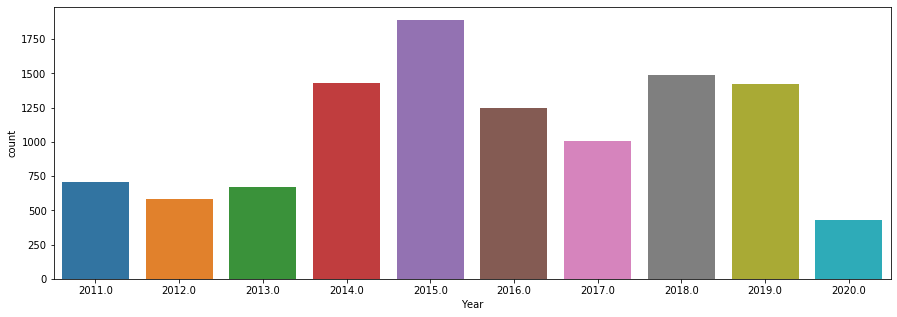

In [19]:
fig, ax = plt.subplots(figsize=[15,5])
sns.countplot(ax=ax, x="Year", data=df)

I watched most videos in 2015

I create another variable that categorizes how long a video has been online until I watched it

In [20]:
def days_online_to_category(x):
    if x < 30:
        return "few"
    if x < 150:
        return "some"
    return "a lot"

In [21]:
df["days_online_cat"] = df["days_online_until_watched"].apply(lambda x: days_online_to_category(x))

In [22]:
df = df.drop(axis=1, columns=["favoriteCount"])

In [23]:
cols = ["commentCount", "dislikeCount", "likeCount", "viewCount"]
for col in cols:
    df = df[df[col] != "no data"]
    print(str(col) + " " + str(df[df[col] == "no data"].shape[0]))

commentCount 0
dislikeCount 0
likeCount 0
viewCount 0


In [24]:
df["likes_to_dislikes"] = df["likeCount"].astype(int) / df["dislikeCount"].astype(int)
df = df[df.likes_to_dislikes < np.inf]

In [25]:
df.head(1)

,Video_Title,Video_URL,Video_Channel,Clicked_Date,Video_ID,Year,Month,Day of Week,viewCount,likeCount,dislikeCount,commentCount,caption,description,tags,category,category_name,duration,duration in seconds,defaultAudioLanguage,definition,dimension,licensedContent,projection,publishedAt,time_online_until_watched,days_online_until_watched,watched_after_search,days_online_cat,likes_to_dislikes
0,Improve Your Manual Skills | MTB Coaching With...,https://www.youtube.com/watch?v=Kzdc_mbHJQQ,Global Mountain Bike Network,2020-04-08 17:45:36,Kzdc_mbHJQQ,2020.0,4.0,Wednesday,636942,11212,156,708,True,Manualing a mountain bike is an awesome skill ...,"['GMBN', 'Global Mountain Bike Network', 'moun...",17.0,Sports,0 days 00:13:37.000000000,817.0,en,hd,2d,True,rectangular,2019-01-16T10:00:02.000Z,448 days 07:45:34.000000000,448,False,a lot,71.871795


### 1. Insight: Now, I watch more often older videos

2020 only holds data until April so it is not representative yet. But if we compare the years 2016-2019 with 2011-2015 we see a clear difference

In [44]:
df_few_days = df[df["days_online_until_watched"] < 365]

In [45]:
df_few_days["days_online_cat"] = df_few_days["days_online_until_watched"].apply(lambda x: days_online_to_category(x))
df_few_days = df_few_days[df_few_days.days_online_until_watched >= 0]

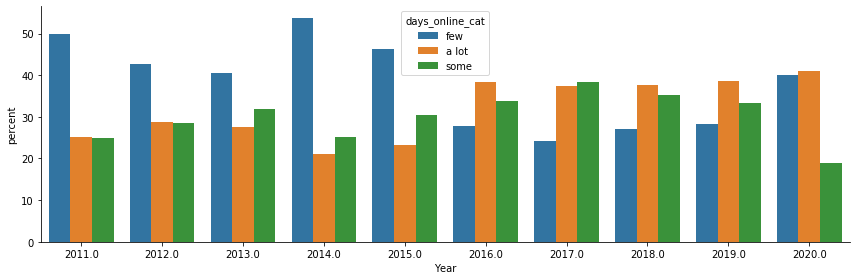

In [46]:
x,y = 'Year', 'days_online_cat'

df1 = df_few_days.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,  legend_out=False, height=4, aspect =3)

### 2. Insight: My taste got better

By looking at the median of likes to dislikes ratio of the videos I watched, we see that either my taste got better or that the youtube algorithm works great in terms of showing me good content

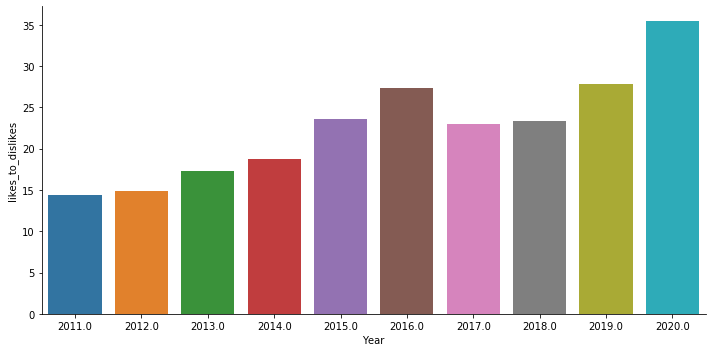

In [47]:
df2 = df.groupby('Year', as_index=False)["likes_to_dislikes"].median()
sns.catplot(x="Year", y='likes_to_dislikes',kind='bar',data=df2, legend_out=False, aspect=2)

In [48]:
df.likes_to_dislikes = df.likes_to_dislikes.astype(float)
df.viewCount = df.viewCount.astype(int)

In [49]:
df.columns

Index(['Video_Title', 'Video_URL', 'Video_Channel', 'Clicked_Date', 'Video_ID',
       'Year', 'Month', 'Day of Week', 'viewCount', 'likeCount',
       'dislikeCount', 'commentCount', 'caption', 'description', 'tags',
       'category', 'category_name', 'duration', 'duration in seconds',
       'defaultAudioLanguage', 'definition', 'dimension', 'licensedContent',
       'projection', 'publishedAt', 'time_online_until_watched',
       'days_online_until_watched', 'watched_after_search', 'days_online_cat',
       'likes_to_dislikes'],
      dtype='object')

### 3. Insight: More controversial videos from 2015-2017

The videos I watched in 2017 where the most commented ones

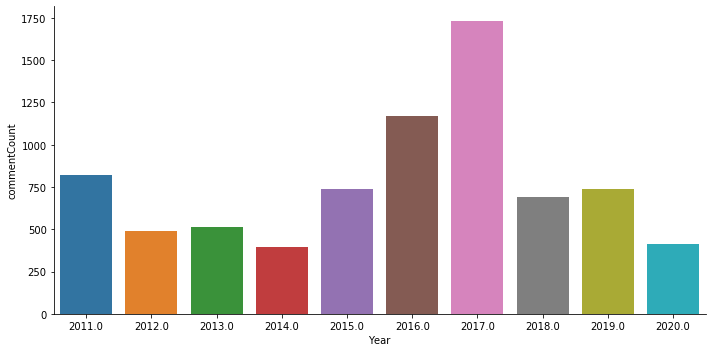

In [51]:
df.commentCount = df.commentCount.astype(int)
df3 = df.groupby('Year', as_index=False)[["commentCount"]].median()
sns.catplot(x="Year", y='commentCount',kind='bar',data=df3, legend_out=False, aspect=2)

### 4. Long DJ Sets & Study Music peak in 2019 and 2020

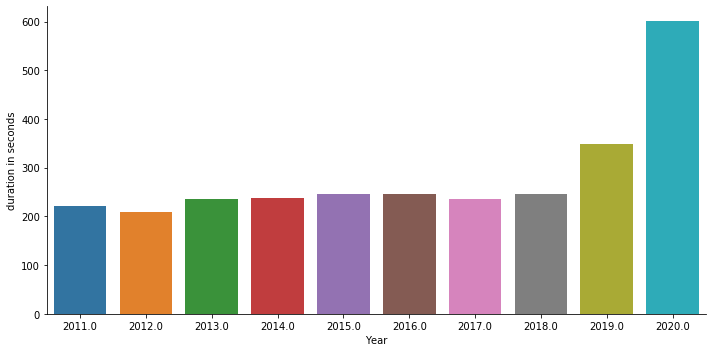

In [53]:
df4 = df.groupby('Year', as_index=False)[["duration in seconds"]].median()
sns.catplot(x="Year", y="duration in seconds",kind='bar',data=df4, legend_out=False, aspect=2)

### Watched after Search doesn't show any interesting insight

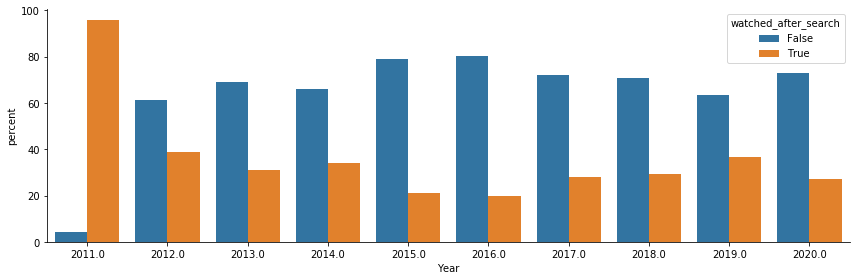

In [54]:
x,y = 'Year', 'watched_after_search'

df5 = df[df["category_name"] == "Music"].groupby(x)[y].value_counts(normalize=True)
df5 = df5.mul(100)
df5 = df5.rename('percent').reset_index()

sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df5,  legend_out=False, height=4, aspect =3)

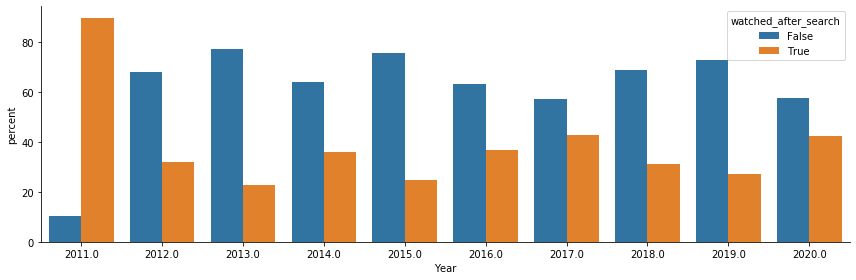

In [55]:
x,y = 'Year', 'watched_after_search'

df5 = df[df["category_name"] == "Sports"].groupby(x)[y].value_counts(normalize=True)
df5 = df5.mul(100)
df5 = df5.rename('percent').reset_index()

sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df5,  legend_out=False, height=4, aspect =3)

### 5. My most watched categories changed over the years

In [63]:
df_thenandnow = df[df.Year.isin([2011, 2012, 2013, 2019, 2020])]

In [64]:
df_thenandnow.Year.value_counts()

2019.0    1250
2011.0     596
2013.0     543
2012.0     494
2020.0     383
Name: Year, dtype: int64

In [65]:
df_thenandnow.category_name.value_counts()

Music                    930
Entertainment            802
Sports                   434
People & Blogs           251
Education                160
Comedy                   123
Science & Technology     122
Gaming                    98
Howto & Style             93
Film & Animation          91
News & Politics           69
Travel & Events           37
Nonprofits & Activism     20
Autos & Vehicles          19
Pets & Animals            17
Name: category_name, dtype: int64

In [66]:
def past_or_present(x):
    if x in [2011, 2012, 2013]:
        return "Then"
    else:
        return "Now"

In [67]:
df_thenandnow["Stage_in_Life"] = df_thenandnow.Year.apply(lambda x: past_or_present(x))

In [68]:
df_thenandnow.Stage_in_Life.value_counts()

Then    1633
Now     1633
Name: Stage_in_Life, dtype: int64

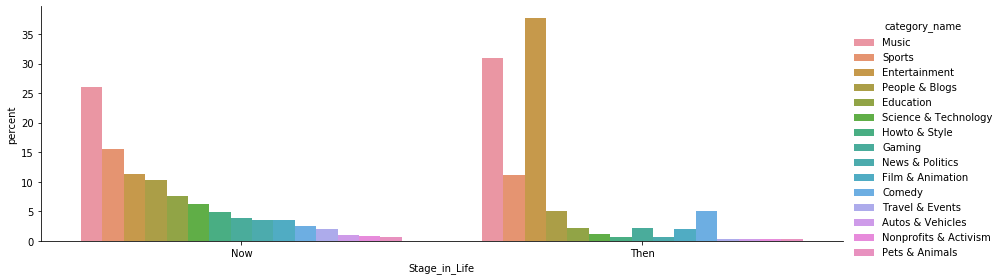

In [69]:
x,y = 'Stage_in_Life', 'category_name'

df6 = df_thenandnow.groupby(x)[y].value_counts(normalize=True)
df6 = df6.mul(100)
df6 = df6.rename('percent').reset_index()

sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df6,  legend_out=True, height=4, aspect =3)

In [70]:
df["viewCount"] = df.viewCount.astype(int)

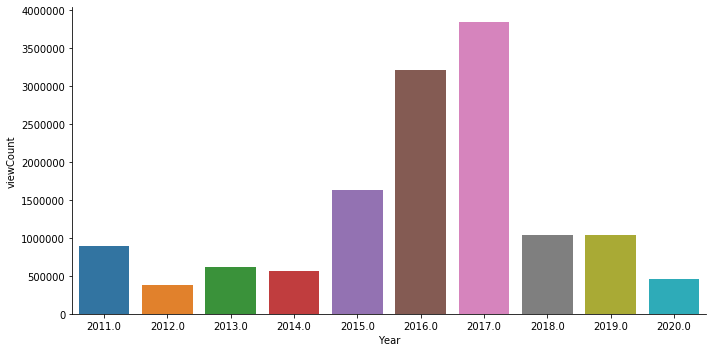

In [71]:
df7 = df.groupby('Year', as_index=False).agg({"viewCount": "median"})
sns.catplot(x="Year", y="viewCount",kind='bar',data=df7, legend_out=False, aspect=2)